In [187]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression

%matplotlib inline
df.describe()

,rooms,floor,size,price,day,month,year,number
count,455897.000000,455897.000000,455897.000000,4.558970e+05,455897.000000,455897.000000,455897.000000,455897.000000
mean,3.769829,3.002196,91.943003,1.269420e+06,15.943757,6.563118,2012.059529,26.010759
std,1.080458,2.996025,62.595473,1.054809e+06,8.856427,3.485928,5.913617,77.067907
min,1.000000,0.000000,20.150000,1.000000e+05,1.000000,1.000000,1998.000000,1.000000
25%,3.000000,1.000000,62.900000,6.670000e+05,8.000000,4.000000,2008.000000,6.000000
50%,4.000000,2.000000,83.000000,1.075000e+06,16.000000,7.000000,2013.000000,13.000000
75%,4.000000,4.000000,107.300000,1.600000e+06,24.000000,10.000000,2017.000000,29.000000
max,16.000000,48.000000,7394.000000,6.860200e+07,31.000000,12.000000,2021.000000,7027.000000


In [198]:
df = pd.read_csv("fullHouses.csv")
df1 = pd.to_datetime({'year': df['year'],
                   'month': df['month'],
                   'day': df['day']})
df=pd.concat([df, df1], axis=1)
df['0']=df['0'].map(dt.datetime.toordinal)
df

KeyError: '0'

In [189]:
tlvDf=df[df['city'].str.contains("תל אביב")]
tlvDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8096 entries, 434110 to 442516
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   city           8096 non-null   object        
 1   neighborhoods  8096 non-null   object        
 2   date           8096 non-null   object        
 3   address        8096 non-null   object        
 4   helka          8096 non-null   object        
 5   kind           8096 non-null   object        
 6   rooms          8096 non-null   float64       
 7   floor          8096 non-null   int64         
 8   size           8096 non-null   float64       
 9   price          8096 non-null   float64       
 10  day            8096 non-null   int64         
 11  month          8096 non-null   int64         
 12  year           8096 non-null   int64         
 13  street         8096 non-null   object        
 14  number         8096 non-null   int64         
 15  0             

In [190]:
tlvDf.sort_values(by=['year','month','day'], ascending=True, inplace=True)
tlvDf.head(20)

<ipython-input-190-7c70695bb4d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tlvDf.sort_values(by=['year','month','day'], ascending=True, inplace=True)


,city,neighborhoods,date,address,helka,kind,rooms,floor,size,price,day,month,year,street,number,0
436253,תל אביב -יפו,נווה דן,13.05.1998,חילו יצחק 1,6623-548-1,דירה בבית קומות,6.0,1,150.00,2769000.0,13,5,1998,חילו יצחק,1,1998-05-13
440612,תל אביב -יפו,נווה דן,13.05.1998,חילו יצחק 1,6623-548-1,דירה בבית קומות,6.0,1,150.00,2769000.0,13,5,1998,חילו יצחק,1,1998-05-13
436252,תל אביב -יפו,נווה דן,07.07.1998,פתחיה מרגנשבורג 12,6623-554-2,דירה בבית קומות,5.0,1,752.00,2018000.0,7,7,1998,פתחיה מרגנשבורג,12,1998-07-07
440611,תל אביב -יפו,נווה דן,07.07.1998,פתחיה מרגנשבורג 12,6623-554-2,דירה בבית קומות,5.0,1,752.00,2018000.0,7,7,1998,פתחיה מרגנשבורג,12,1998-07-07
436251,תל אביב -יפו,נווה דן,16.10.1998,רומנילי 7,6623-607-3,דירה בבית קומות,5.0,0,223.31,2513000.0,16,10,1998,רומנילי,7,1998-10-16
440610,תל אביב -יפו,נווה דן,16.10.1998,רומנילי 7,6623-607-3,דירה בבית קומות,5.0,0,223.31,2513000.0,16,10,1998,רומנילי,7,1998-10-16
436250,תל אביב -יפו,נווה דן,23.11.1998,בנימין מטודלה 48,6623-550-2,דירה בבית קומות,6.0,0,201.54,2355000.0,23,11,1998,בנימין מטודלה,48,1998-11-23
440609,תל אביב -יפו,נווה דן,23.11.1998,בנימין מטודלה 48,6623-550-2,דירה בבית קומות,6.0,0,201.54,2355000.0,23,11,1998,בנימין מטודלה,48,1998-11-23
436249,תל אביב -יפו,נווה דן,23.02.1999,תבואות הארץ 18,6637-740-1,דירה בבית קומות,8.0,1,325.00,5070000.0,23,2,1999,תבואות הארץ,18,1999-02-23
440608,תל אביב -יפו,נווה דן,23.02.1999,תבואות הארץ 18,6637-740-1,דירה בבית קומות,8.0,1,325.00,5070000.0,23,2,1999,תבואות הארץ,18,1999-02-23


In [191]:
tlvDf1=pd.get_dummies(tlvDf['rooms'], prefix='rooms')
tlvDf2 = pd.concat([tlvDf, tlvDf1], axis=1)


In [192]:
tlvDf2Numeric = tlvDf2._get_numeric_data()

,rooms,floor,size,price,day,month,year,number,rooms_1.0,rooms_1.5,...,rooms_3.0,rooms_3.5,rooms_4.0,rooms_4.5,rooms_5.0,rooms_5.5,rooms_6.0,rooms_7.0,rooms_8.0,rooms_9.0
436253,6.0,1,150.00,2769000.0,13,5,1998,1,0,0,...,0,0,0,0,0,0,1,0,0,0
440612,6.0,1,150.00,2769000.0,13,5,1998,1,0,0,...,0,0,0,0,0,0,1,0,0,0
436252,5.0,1,752.00,2018000.0,7,7,1998,12,0,0,...,0,0,0,0,1,0,0,0,0,0
440611,5.0,1,752.00,2018000.0,7,7,1998,12,0,0,...,0,0,0,0,1,0,0,0,0,0
436251,5.0,0,223.31,2513000.0,16,10,1998,7,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435983,7.0,0,183.00,3024000.0,4,2,2021,11,0,0,...,0,0,0,0,0,0,0,1,0,0
440156,3.0,2,74.28,4300000.0,4,2,2021,24,0,0,...,1,0,0,0,0,0,0,0,0,0
440342,7.0,0,183.00,3024000.0,4,2,2021,11,0,0,...,0,0,0,0,0,0,0,1,0,0
434418,3.0,1,58.00,1660000.0,7,2,2021,11,0,0,...,1,0,0,0,0,0,0,0,0,0


In [186]:
X = tlvDf2Numeric.drop(["price"], axis="columns")
y = tlvDf2Numeric['price']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [143]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)


In [144]:
print(f"med: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"r^2: {metrics.r2_score(y_test, y_pred)}")

med: 2766343637667.567
r^2: 0.5165948928662953


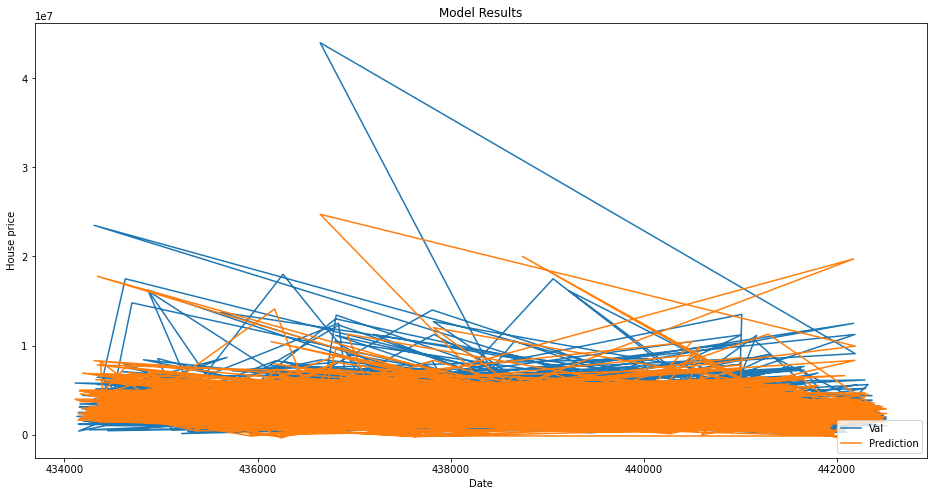

In [155]:
# train = pd.DataFrame()
valid = pd.DataFrame()
train['Close'] = y_train
valid['Close'] = y_test
valid['Prediction'] = y_pred
#Visualization
plt.figure(figsize=(16,8))
plt.title('Model Results')
plt.xlabel('Date')
plt.ylabel('House price')
# plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Val', 'Prediction'], loc = 'lower right')


In [157]:
y_pred

array([2400018.44680081, 1664521.95387462, 1537658.46745798, ...,
       3984859.66695783, 1856623.15455213, 5062875.21573484])

In [160]:
y_testArr=list(y_test)

In [163]:
y_predArr = list(y_pred)
y_predArr

[2400018.446800813,
 1664521.9538746178,
 1537658.46745798,
 1980306.1307258308,
 2041793.377474308,
 5358525.762653984,
 6026656.625595443,
 6638532.283670723,
 2233517.90817973,
 2800698.0609225184,
 1014870.2933968306,
 1878474.1670841873,
 3255907.806035161,
 1885620.4147780836,
 2087750.0355828106,
 1556289.8802678883,
 3197379.319034964,
 2994900.7120358944,
 2161322.817316979,
 4108887.229807332,
 3507539.4831510037,
 2179260.029408157,
 2343529.2564047873,
 2144409.1298956275,
 850416.7582901418,
 8210746.254567921,
 1967176.6895977259,
 3629240.2187583297,
 6493647.631482691,
 670367.9982237518,
 2973331.039446935,
 2542016.738861233,
 2514323.417450398,
 1743817.9829667509,
 4476096.945122294,
 1664521.9538746178,
 1997769.7877107859,
 9824484.233316107,
 3829104.843613915,
 2015231.7450600564,
 3507712.1270250827,
 1988023.7810973227,
 3136478.912209779,
 17777138.752836123,
 2343572.293256551,
 5188350.978302017,
 1581854.1149322689,
 7827505.24354212,
 5897288.532767624,
 

In [170]:
counter=0
for i in range(len(y_testArr)):
    if y_predArr[i]>= y_testArr[i]*0.9 and y_predArr[i]<=y_testArr[i]*1.1:
        counter+=1
print(counter/len(y_testArr))

0.18271604938271604
